In [1]:
import tensorflow as tf

import numpy as np
from matplotlib import pyplot as plt 

from datasets.Dataset import Dataset
from core.argo.core.ArgoLauncher import ArgoLauncher
from core.argo.core.TFDeepLearningModel import load_model, load_network
from core.argo.core.utils.argo_utils import load_class
from core.transform.transform import get_transform_module, check_dataset_shapes

/data1/env/tf1.12.0/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:75: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  return _inspect.getargspec(target)


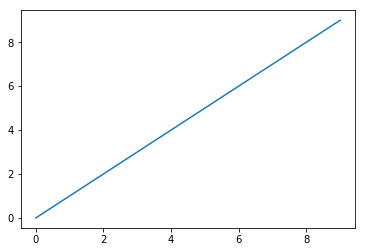

In [2]:
plt.plot(np.arange(10))

In [3]:
tf.set_random_seed(1000)

tf.reset_default_graph()

import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]='1'
sess_config = tf.ConfigProto()
sess_config.gpu_options.allow_growth=True
sess = tf.Session(config = sess_config)

In [4]:
# ffconffile = '/home/luigi/adversarial/prediction/temp/MNIST-c-st0/FF_st0-stp0-st0-stp0-re0.0001-bs32-trGD_lr0.05-cNo-D200_D200_D10-aR-wix-bic0.1-r0/experiment.conf'
# ffconffile = '/data/ironman_hd1/FashionMNIST-st0/FF_st0-stp0-re0.0-bs32-trA_lr0.001_bo0.9_bt0.999-C32o3-3_C32o3-3_D200_D10-arelu-wix-bic0.1-r0/experiment.conf'
# NB i saved the model every 20 epochs
# 34360 # 68720 # 103080
#ff_global_step = 68720
ffconffile = "/data/wonderwoman_hd3/adversarial_small/prediction/FashionMNIST-st0/FF-cCE-st2-stp0.1-bs32-trA_lrm1e-07E.i0.0001.s10000.0.r0.99_bo0.9_bt0.999-cGN100.0-nCNo64,64k3,3s2,2_D200_D10-cpS-aR-wign-bic10.0-wrLtwo0.001-r1/experiment.conf"
ff_global_step = None

# autoencconffile = '/home/luigi/adversarial/vae/temp/MNIST-c-st0/VAE-cELBO_b1.0_wuW5-d0-st1-stp0.01-re1e-05-bs128-trA_lr0.0001_bo0.9_bt0.999-cGN3-e_D200_D200_GDd-d_D200_D200_GD01d.scT-cpS-aE-wix-bic0.1-r0/experiment.conf'
# autoencconffile = '/data/ironman_hd1/FashionMNIST-st0/VAE-cELBO_b1.0_wuW5-st1-stp0.01-d0-re1e-05-bs32-trA_lr0.001_bo0.9_bt0.999-e_CN-o256-512-1024k3-3s2-2-1_GDd64-d_D50176_BR_CNT-o512-256-1k3-3s1-2-2_LNDd-cpS-arelu-wix-bic0.1-r0/experiment.conf'
autoencconffile = "/data/wonderwoman_hd3/adversarial_small/vae/FashionMNIST-st0/VAE-cELBO_b1.0_wuW5-s10-d1-st2-stp0.1-bs32-trA_lrm1e-07E.i1e-04.s1e+04.r0.99_bo0.9_bt0.999-cGN100.0-ne_CNo32,32k3,3s2,2_GDd32-nd_D1568_BR_CNTo32,1k3,3s2,2_GDd-mc0.0001-cpS-aR-wign-bic10.0-wrLtwo1e-05-r0/experiment.conf"
ae_global_step = None  # 


In [5]:
is_training = False

In [6]:
ff_dataset_conf, ff_model_parameters, ff_config = ArgoLauncher.process_conf_file(ffconffile)
ff_dataset = Dataset.load_dataset(ff_dataset_conf)
_x_shape = ff_dataset.x_shape_eval

full_class_path = "prediction.core." + ff_model_parameters["model"]
prediction_model_class = load_class(full_class_path)

ff_network, ff_checkpoint_name = load_network(prediction_model_class, ffconffile, global_step=ff_global_step)
x_shape = (None,) + _x_shape

dummy_x = tf.placeholder(tf.float32, shape=x_shape, name='dummy_input')


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
 From /home/ricvo/adversarial/datasets/FashionMNIST.py:159: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
 From /data1/env/tf1.12.0/lib/python3.6/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
 From /data1/env/tf1.12.0/lib/python3.6/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:262: extract_images (fr

In [7]:
# LOAD FF NETWORK
dummy_logits = ff_network(dummy_x, is_training = is_training)
ff_network.restore(sess, ff_checkpoint_name)

# CALLABLE
ff_module = ff_network.module


Parsing network network...
 Loading sonnet module ConvNet2D
 Loading sonnet module BatchFlatten
 Loading sonnet module Linear
 Loading sonnet module Linear
INFO:tensorflow:Restoring parameters from /data/wonderwoman_hd3/adversarial_small/prediction/FashionMNIST-st0/FF-cCE-st2-stp0.1-bs32-trA_lrm1e-07E.i0.0001.s10000.0.r0.99_bo0.9_bt0.999-cGN100.0-nCNo64,64k3,3s2,2_D200_D10-cpS-aR-wign-bic10.0-wrLtwo0.001-r1/saved_models/model.ckpt-517118
 Restoring parameters from /data/wonderwoman_hd3/adversarial_small/prediction/FashionMNIST-st0/FF-cCE-st2-stp0.1-bs32-trA_lrm1e-07E.i0.0001.s10000.0.r0.99_bo0.9_bt0.999-cGN100.0-nCNo64,64k3,3s2,2_D200_D10-cpS-aR-wign-bic10.0-wrLtwo0.001-r1/saved_models/model.ckpt-517118


In [8]:
# transform_tuple = ("vae", {"conf_file" : "/data/wonderwoman_hd3/adversarial_small/vae/FashionMNIST-st0/VAE-cELBO_b1.0_wuW5-s10-d1-st2-stp0.1-bs32-trA_lrm1e-07E.i1e-04.s1e+04.r0.99_bo0.9_bt0.999-cGN100.0-ne_CNo32,32k3,3s2,2_GDd32-nd_D1568_BR_CNTo32,1k3,3s2,2_GDd-mc0.0001-cpS-aR-wign-bic10.0-wrLtwo1e-05-r0/experiment.conf",
#                        "global_step" : None,
#                        "sample_hid" : False,
#                        "sample_vis" : False,
#                        "z_std_scale" : 1.})

transform_tuple = ("ae", {"conf_file" : "/data/wonderwoman_hd3/adversarial_small/ae/FashionMNIST-st0/AE-cLL-d1-st2-stp0.1-bs32-trA_lrm1e-07E.i1e-04.s1e+04.r0.99_bo0.9_bt0.999-cGN100.0-ne_CNo32,32k3,3s2,2_D32-nd_D1568_BR_CNTo32,1k3,3s2,2_GDd-mc0.0001-cpS-aR-wign-bic10.0-wrLtwo1e-05-r0/experiment.conf",
                       "global_step" : None,
                       "sample_vis" : False}
                  )


transform_name, transform_kwargs = transform_tuple
transform_kwargs.update(
    {
        "dummy_x": dummy_x,
        "sess" : sess,
        "is_training" : is_training
    }
)

transform_module = get_transform_module(transform_name, transform_kwargs)



Extracting /ssd_data/datasets/fashionMNIST/train-images-idx3-ubyte.gz
Extracting /ssd_data/datasets/fashionMNIST/train-labels-idx1-ubyte.gz
Extracting /ssd_data/datasets/fashionMNIST/t10k-images-idx3-ubyte.gz
Extracting /ssd_data/datasets/fashionMNIST/t10k-labels-idx1-ubyte.gz
Parsing encoder network...
 Loading sonnet module ConvNet2D
 Loading sonnet module BatchFlatten
 Loading sonnet module Linear
Parsing decoder network...
 Loading sonnet module Linear
 Loading sonnet module BatchReshape
 Loading sonnet module ConvNet2DTranspose
 `use_batch_norm` kwarg is deprecated. Change your code to instead specify `normalization_ctor` and `normalization_kwargs`.
 Loading sonnet module BatchFlatten
 Loading sonnet module GaussianDiagonal


/data1/env/tf1.12.0/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/data1/env/tf1.12.0/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


 Loading sonnet module Linear
 Loading sonnet module Linear
INFO:tensorflow:Restoring parameters from /data/wonderwoman_hd3/adversarial_small/ae/FashionMNIST-st0/AE-cLL-d1-st2-stp0.1-bs32-trA_lrm1e-07E.i1e-04.s1e+04.r0.99_bo0.9_bt0.999-cGN100.0-ne_CNo32,32k3,3s2,2_D32-nd_D1568_BR_CNTo32,1k3,3s2,2_GDd-mc0.0001-cpS-aR-wign-bic10.0-wrLtwo1e-05-r0/saved_models/model.ckpt-517118
 Restoring parameters from /data/wonderwoman_hd3/adversarial_small/ae/FashionMNIST-st0/AE-cLL-d1-st2-stp0.1-bs32-trA_lrm1e-07E.i1e-04.s1e+04.r0.99_bo0.9_bt0.999-cGN100.0-ne_CNo32,32k3,3s2,2_D32-nd_D1568_BR_CNTo32,1k3,3s2,2_GDd-mc0.0001-cpS-aR-wign-bic10.0-wrLtwo1e-05-r0/saved_models/model.ckpt-517118


In [9]:
#THIS IS HOW YOU GET THE DATASET ITERATOR
DATASET = "test"
dataset = ff_dataset

iterator, is_perturbed = dataset.get_dataset_iterator(
                                    batch_size = 1, 
                                    dataset_str = DATASET,
                                    shuffle = False,
                                    repeat = False,
                                    augment = False)

# x_singleimg = tf.placeholder(tf.float32, input_shape)
# x = tf.expand_dims(x_singleimg, axis=0)
# y = tf.placeholder(tf.int64, shape = ())
x, y = iterator.get_next()
y = tf.cast(y, tf.int32)
ds_initializer = iterator.initializer
print("next batch of input x:", x)
print("next batch of labels y:", y)


next batch of input x: Tensor("IteratorGetNext:0", shape=(?, 28, 28, 1), dtype=float32)
next batch of labels y: Tensor("Cast:0", shape=(?,), dtype=int32)


/data1/env/tf1.12.0/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:75: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  return _inspect.getargspec(target)
/data1/env/tf1.12.0/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:75: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  return _inspect.getargspec(target)


In [10]:
logits = ff_module(x)
x_transf = transform_module(x)
logits_transf = ff_module(x_transf)

accuracy = 100. * tf.reduce_mean(tf.cast(
                   tf.equal(tf.argmax(logits, axis = 1),
                         tf.cast(y, dtype = tf.int64)),
                         dtype = tf.float32))

accuracy_transf = 100. * tf.reduce_mean(tf.cast(
                   tf.equal(tf.argmax(logits_transf, axis = 1),
                         tf.cast(y, dtype = tf.int64)),
                         dtype = tf.float32))

preds = tf.argmax(logits, axis=1, output_type=tf.int32)
preds_transf = tf.argmax(logits_transf, axis=1, output_type=tf.int32)
print(logits, preds)

probs = tf.nn.softmax(logits)
correct = tf.equal(preds, y)

probs_transf = tf.nn.softmax(logits_transf)
correct_transf = tf.equal(preds_transf, y)

Parsing network network...
 Loading sonnet module ConvNet2D
 Loading sonnet module BatchFlatten
 Loading sonnet module Linear
 Loading sonnet module Linear
Parsing encoder network...
 Loading sonnet module ConvNet2D
 Loading sonnet module BatchFlatten
 Loading sonnet module Linear
Parsing decoder network...
 Loading sonnet module Linear
 Loading sonnet module BatchReshape
 Loading sonnet module ConvNet2DTranspose
 Loading sonnet module BatchFlatten
 Loading sonnet module GaussianDiagonal
 Loading sonnet module Linear
 Loading sonnet module Linear
Parsing network network...
 Loading sonnet module ConvNet2D
 Loading sonnet module BatchFlatten
 Loading sonnet module Linear
 Loading sonnet module Linear
Tensor("network/linear_1/add:0", shape=(?, 10), dtype=float32) Tensor("ArgMax_2:0", shape=(?,), dtype=int32)


In [11]:
input_shape = dataset.x_shape
n_classes = dataset.n_labels
print(input_shape, n_classes)

(28, 28, 1) 10


In [12]:
#THIS IS HOW YOU READ IN SEQUENCE
sess.run(ds_initializer)
x_np, y_np = sess.run([x,y])
print(x_np.shape, y_np.shape)
print(y_np)

(1, 28, 28, 1) (1,)
[9]


# Classifier

In [13]:

def get_cmap(img):
    ch = None
    if len(img.shape) == 3:
        ch = 2
    elif len(img.shape) == 4:
        ch = 3
    else:
        raise Exception("expeting either a 3D or a 4D tensor")
    
    channels = img.shape[ch]
    if channels==3:
        cmap = 'rgb'
    elif channels==1:
        cmap = 'gray'
    else:
        raise Exception("image channel value not valid")
    return cmap

def classify(img, inputs, probs, correct_class=None, target_class=None):
    if img.shape[0]!=1:
        raise Exception("expected a batch of a single image, received shape: %s"%img.shape)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 8))
    fig.sca(ax1)
    p = sess.run(probs, feed_dict={inputs: img})[0]
    
    cmap = get_cmap(img)
    ax1.imshow(np.squeeze(img), cmap = cmap)
    fig.sca(ax1)

    topk = list(p.argsort()[-10:][::-1])
    topprobs = p[topk]
    barlist = ax2.bar(range(10), topprobs)
    if target_class in topk:
        barlist[topk.index(target_class)].set_color('r')
    if correct_class in topk:
        barlist[topk.index(correct_class)].set_color('g')
    plt.sca(ax2)
    plt.ylim([0, 1.1])
    plt.xticks(range(10),
               [dataset.label_to_name(i)[:15] for i in topk],
               rotation='vertical')
    fig.subplots_adjust(bottom=0.2)
    plt.show()

def classify_transf(img, inputs, inputs_transf, probs, correct_class=None, target_class=None):
    if img.shape[0]!=1:
        raise Exception("expected a batch of a single image, received shape: %s"%img.shape)
    
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 8))
    fig.sca(ax1)
    p, img_transf = sess.run([probs, inputs_transf], feed_dict={inputs: img})
    p = p[0]
    
    cmap = get_cmap(img)

    ax1.imshow(np.squeeze(img), cmap = cmap)
    fig.sca(ax1)
    ax2.imshow(np.squeeze(img_transf), cmap = cmap)
    fig.sca(ax2)

    topk = list(p.argsort()[-10:][::-1])
    topprobs = p[topk]
    barlist = ax3.bar(range(10), topprobs)
    if target_class in topk:
        barlist[topk.index(target_class)].set_color('r')
    if correct_class in topk:
        barlist[topk.index(correct_class)].set_color('g')
    plt.sca(ax3)
    plt.ylim([0, 1.1])
    plt.xticks(range(10),
               [dataset.label_to_name(i)[:15] for i in topk],
               rotation='vertical')
    fig.subplots_adjust(bottom=0.2)
    plt.show()


def plot_imgs(imgs, rows, cols):
    f, axarr = plt.subplots(rows, cols)
    axarr = axarr.reshape(rows,cols)
    cmap = get_cmap(imgs[0])
    for i in range(rows):
        for j in range(cols):
            axarr[i,j].imshow(np.squeeze(imgs[i*cols+j]), cmap = cmap)


/data1/env/tf1.12.0/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


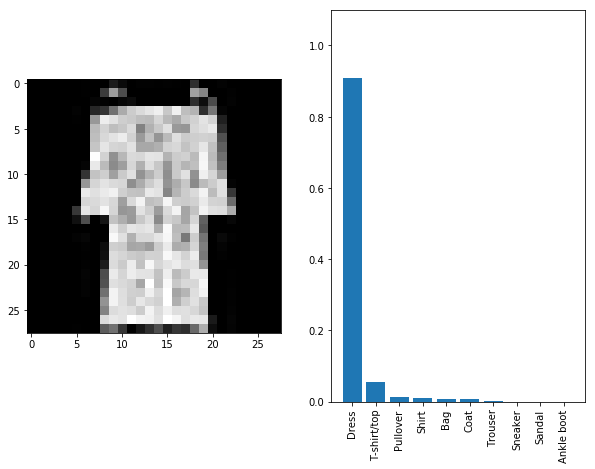

In [14]:
classify(dataset.get_raw_elements(DATASET, [33]), x, probs)

/data1/env/tf1.12.0/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


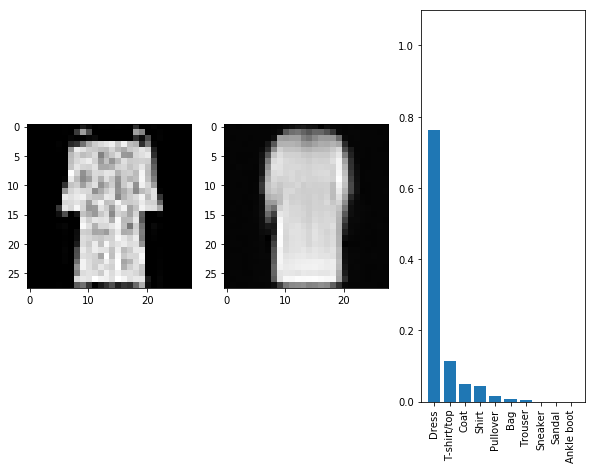

In [15]:
classify_transf(dataset.get_raw_elements(DATASET, [33]), x, x_transf, probs_transf)

In [17]:
np.min(sess.run(x_transf))

-1.097722